In [1]:
# TO USE FOR ENTIRE TEAM
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
df = pd.read_csv('online_shoppers_intention.csv', na_values=r'-')

<table class="tg">
<tbody>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Data Dictionary</strong></td>
</tr>
<tr>
<tr>
<th class="tg-0pky">Variable</th>
<th class="tg-0pky">Variable Name</th>
<th class="tg-0pky">Variable Definition</th>
<th class="tg-fymr">Data Type</th>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Web Page Analytics &ndash; Numerical</strong></td>
</tr>
<tr>
<td class="tg-0pky"><strong>Home Page</strong></td>
<td class="tg-fymr">Administrative</td>
<td class="tg-fymr">Number of pages visited by the visitor about account management.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Home Page Duration</strong></td>
<td class="tg-fymr">Administrative_Duration</td>
<td class="tg-fymr">The total amount of time (in seconds) the visitor spent on account management-related pages.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Inforation Page</strong></td>
<td class="tg-fymr">Informational</td>
<td class="tg-fymr">Number of pages visited by the visitor about Web site and its communciation and address information.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Informational Duration</strong></td>
<td class="tg-fymr">Informational Duration</td>
<td class="tg-fymr">The total amount of time (in seconds) the visitor spent on informational pages.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Product Page</strong></td>
<td class="tg-fymr">ProductRelated</td>
<td class="tg-fymr">Number of pages visited by the visitor about product-related pages.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Product Related Duration</strong></td>
<td class="tg-fymr">ProductRelated_Duration</td>
<td class="tg-fymr">The total amount of time (in seconds) the visitor spent on product-related pages</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Bounce Rate</strong></td>
<td class="tg-fymr">BounceRates</td>
<td class="tg-fymr">The percentage of single page visits (or web sessions). It is the percentage of visits in which a person leaves your website from the landing page without browsing any further.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Exit Rate</strong></td>
<td class="tg-fymr">ExitRates</td>
<td class="tg-fymr">For all pageviews to the page, Exit Rate is the percentage that were the last in the session</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Page Value</strong></td>
<td class="tg-fymr">PageValues</td>
<td class="tg-fymr">the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both). This value is intended to give you an idea of which page in your site contributed more to your site's revenue.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Special Day</strong></td>
<td class="tg-fymr">SpecialDay</td>
<td class="tg-fymr">the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Web Page Analytics &ndash;Categorical</strong></td>
</tr>
<tr>
<td class="tg-0pky"><strong>Month</strong></td>
<td class="tg-fymr">Month</td>
<td class="tg-fymr">Month in which the visit took place</td>
<td class="tg-0pky">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>OperatingSystems</strong></td>
<td class="tg-fymr">OperatingSystems</td>
<td class="tg-fymr">Operating system of the computer in which the user used while viewing the site</td>
<td class="tg-0pky">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Browser</strong></td>
<td class="tg-fymr">Browser</td>
<td class="tg-fymr">Browser in which the user used to view the site</td>
<td class="tg-fymr">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Region</strong></td>
<td class="tg-fymr">Region</td>
<td class="tg-fymr">Region wher ethe user is located</td>
<td class="tg-fymr">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>TrafficType</strong></td>
<td class="tg-fymr">TrafficType</td>
<td class="tg-fymr">Traffic source by which the visitor has arrived at the Web site - e.g., banner, SMS, direct (20 possible types)</td>
<td class="tg-fymr">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Visitor Type</strong></td>
<td class="tg-fymr">VisitorType</td>
<td class="tg-fymr">Is this a returing visitor or a new visitor</td>
<td class="tg-fymr">Binary/Boolean</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Weekend</strong></td>
<td class="tg-fymr">Weekend</td>
<td class="tg-fymr">Did the visit happen on the weekend?</td>
<td class="tg-fymr">Binary/Boolean</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Revenue</strong></td>
<td class="tg-fymr">Revenue</td>
<td class="tg-fymr">Did the visit result in Revenue?</td>
<td class="tg-fymr">Binary/Boolean</td>
</tr>
<tr>


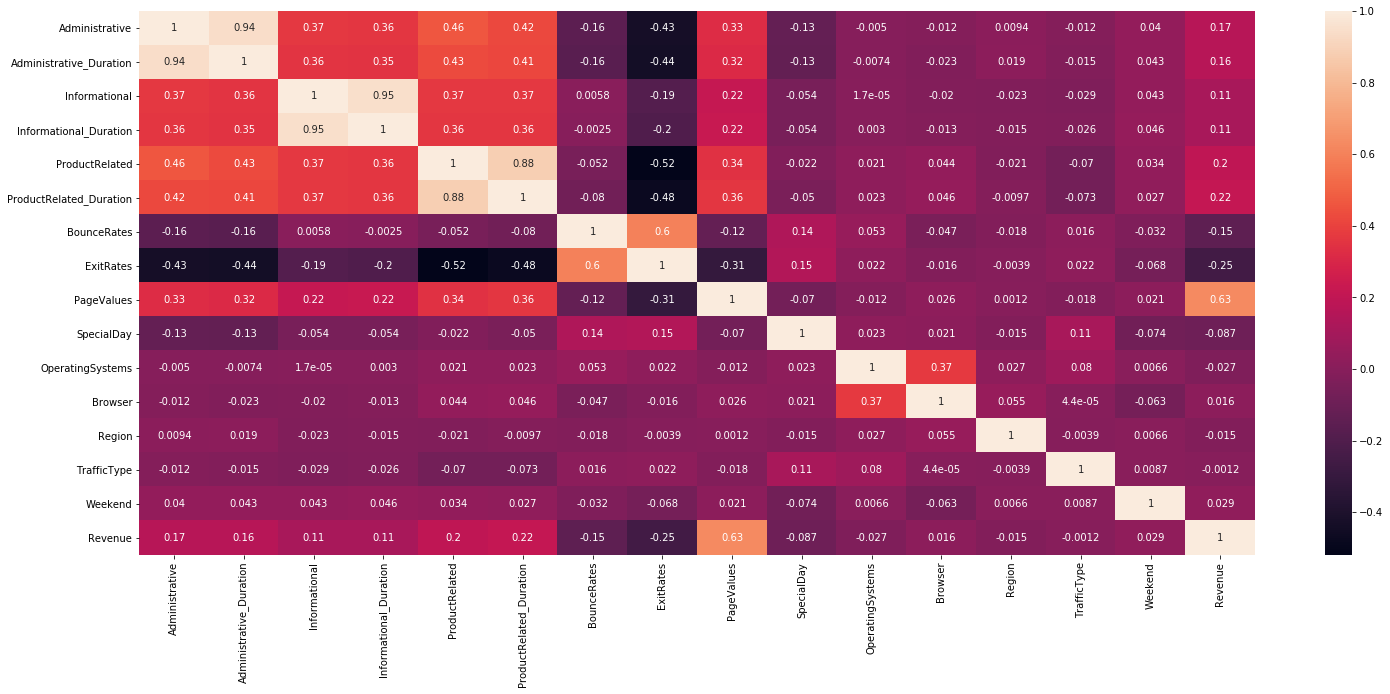

In [3]:
# Correlation Heatmap for the dataframe
spearman =df.corr(method ='spearman')
plt.figure(figsize=(25,10))
sns.heatmap(spearman, annot=True)

In [4]:
df.sample(15)

Administrative  Administrative_Duration  Informational  \
8634                2                26.666667              0   
6937                4               104.200000              0   
10417               0                 0.000000              0   
6539                1                23.200000              0   
11815               5               103.875000              0   
3800                2               225.000000              0   
4386                0                 0.000000              0   
5857                2                55.400000              0   
3131                0                 0.000000              0   
7549                6               132.220000              3   
9782                0                 0.000000              0   
5213                0                 0.000000              2   
12216               1                 0.000000              2   
11336               0                 0.000000              0   
2379                4               149.500000              3   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
8634                     0.00              79              2619.109709   
6937                     0.00              19               456.900000   
10417                    0.00               6               316.250000   
6539                     0.00               0                 0.000000   
11815                    0.00               6                81.375000   
3800                     0.00               6               549.000000   
4386                     0.00              18               668.250000   
5857                     0.00              20               654.200000   
3131                     0.00               1                24.000000   
7549                    18.00              22               418.844444   
9782                     0.00              12               440.750000   
5213                   172.00              32              1227.047222   
12216                   23.75             193              6784.671131   
11336                    0.00              30               685.750000   
2379                    56.50              10               368.000000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
8634      0.016315   0.020748    0.000000         0.0   Nov                 1   
6937      0.000000   0.012500    0.000000         0.0   Aug                 2   
10417     0.000000   0.033333    0.000000         0.0   Dec                 3   
6539      0.000000   0.033333    0.000000         0.0   Oct                 2   
11815     0.000000   0.025000    0.000000         0.0   Dec                 1   
3800      0.000000   0.014286    0.000000         0.0   May                 3   
4386      0.022222   0.035556    0.000000         0.2   May                 3   
5857      0.000000   0.009524    0.000000         0.0   Sep                 4   
3131      0.000000   0.100000    0.000000         0.0   May                 1   
7549      0.000000   0.001020    0.000000         0.0   Oct                 2   
9782      0.000000   0.041667    0.000000         0.0   Dec                 2   
5213      0.005882   0.015787    6.380863         0.0   May                 2   
12216     0.004932   0.021158    0.000000         0.0   Nov                 2   
11336     0.000000   0.036508    0.000000         0.0   Dec                 2   
2379      0.000000   0.013333    0.000000         0.0   May                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
8634         1       3           10  Returning_Visitor     True    False  
6937         2       8            6        New_Visitor     True    False  
10417       13       9           20  Returning_Visitor    False    False  
6539         2       6            3  Returning_Visitor    False     True  
11815        1       3            2  Returning_Visitor     True    False  
3800         2       1            

In [5]:
col_list = df.columns

In [10]:
col_list = col_list.drop(['Month','VisitorType','Weekend','OperatingSystems', 'Browser', 'Region', 'TrafficType','Revenue'])

In [11]:
col_list

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')

In [12]:
# for col in col_list:
#     fig = px.scatter(df, x="PageValues", y=col,facet_col="Revenue", color="TrafficType", trendline="ols", render_mode = 'webgl' )
#     fig.show()

In [13]:
import plotly.express as px
fig = px.scatter(df, x="PageValues", y="Administrative",facet_col="Revenue", color="TrafficType", trendline="ols", render_mode = 'webgl' )
#fig.show()
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

ValueError: 
The orca executable is required to export figures as static images,
but it could not be found on the system path.

Searched for executable 'orca' on the following path:
    C:\Users\Tradeskool\.conda\envs\TYTO
    C:\Users\Tradeskool\.conda\envs\TYTO\Library\mingw-w64\bin
    C:\Users\Tradeskool\.conda\envs\TYTO\Library\usr\bin
    C:\Users\Tradeskool\.conda\envs\TYTO\Library\bin
    C:\Users\Tradeskool\.conda\envs\TYTO\Scripts
    C:\Users\Tradeskool\.conda\envs\TYTO\bin
    C:\ProgramData\Anaconda3\condabin
    C:\ProgramData\Anaconda3
    C:\ProgramData\Anaconda3\Library\mingw-w64\bin
    C:\ProgramData\Anaconda3\Library\usr\bin
    C:\ProgramData\Anaconda3\Library\bin
    C:\ProgramData\Anaconda3\Scripts
    C:\Program Files (x86)\Common Files\Oracle\Java\javapath
    C:\ProgramData\Oracle\Java\javapath
    C:\Program Files (x86)\Intel\iCLS Client
    C:\Program Files\Intel\iCLS Client
    C:\Windows\system32
    C:\Windows
    C:\Windows\System32\Wbem
    C:\Windows\System32\WindowsPowerShell\v1.0
    C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\DAL
    C:\Program Files\Intel\Intel(R) Management Engine Components\DAL
    C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\IPT
    C:\Program Files\Intel\Intel(R) Management Engine Components\IPT
    C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common
    C:\Program Files\FileBot
    C:\WINDOWS\system32
    C:\WINDOWS
    C:\WINDOWS\System32\Wbem
    C:\WINDOWS\System32\WindowsPowerShell\v1.0
    C:\WINDOWS\System32\OpenSSH
    C:\Program Files\SASHome\x86\Secure\ccme4
    C:\Program Files\SASHome\Secure\ccme4
    C:\Users\Tradeskool\AppData\Local\Microsoft\WindowsApps
    C:\Users\Tradeskool\AppData\Roaming\Dashlane\4.6.5.21982\bin\Firefox_Extension\{442718d9-475e-452a-b3e1-fb1ee16b8e9f}\components
    C:\Users\Tradeskool\AppData\Roaming\Dashlane\4.6.6.23032\bin\Firefox_Extension\{442718d9-475e-452a-b3e1-fb1ee16b8e9f}\components
    C:\Users\Tradeskool\AppData\Roaming\Dashlane\6.1907.0.17833\bin\Firefox_Extension\{442718d9-475e-452a-b3e1-fb1ee16b8e9f}\components
    C:\Users\Tradeskool\AppData\Roaming\Dashlane\6.1907.0.17833\ucrt
    C:\Users\Tradeskool\AppData\Roaming\Dashlane\6.1907.0.17833\bin\Qt
    C:\Users\Tradeskool\AppData\Roaming\Dashlane\6.1907.0.17833\bin\Ssl
    C:\Users\Tradeskool\AppData\Local\GitHubDesktop\bin

If you haven't installed orca yet, you can do so using conda as follows:

    $ conda install -c plotly plotly-orca

Alternatively, see other installation methods in the orca project README at
https://github.com/plotly/orca

After installation is complete, no further configuration should be needed.

If you have installed orca, then for some reason plotly.py was unable to
locate it. In this case, set the `plotly.io.orca.config.executable`
property to the full path of your orca executable. For example:

    >>> plotly.io.orca.config.executable = '/path/to/orca'

After updating this executable property, try the export operation again.
If it is successful then you may want to save this configuration so that it
will be applied automatically in future sessions. You can do this as follows:

    >>> plotly.io.orca.config.save()

If you're still having trouble, feel free to ask for help on the forums at
https://community.plot.ly/c/api/python


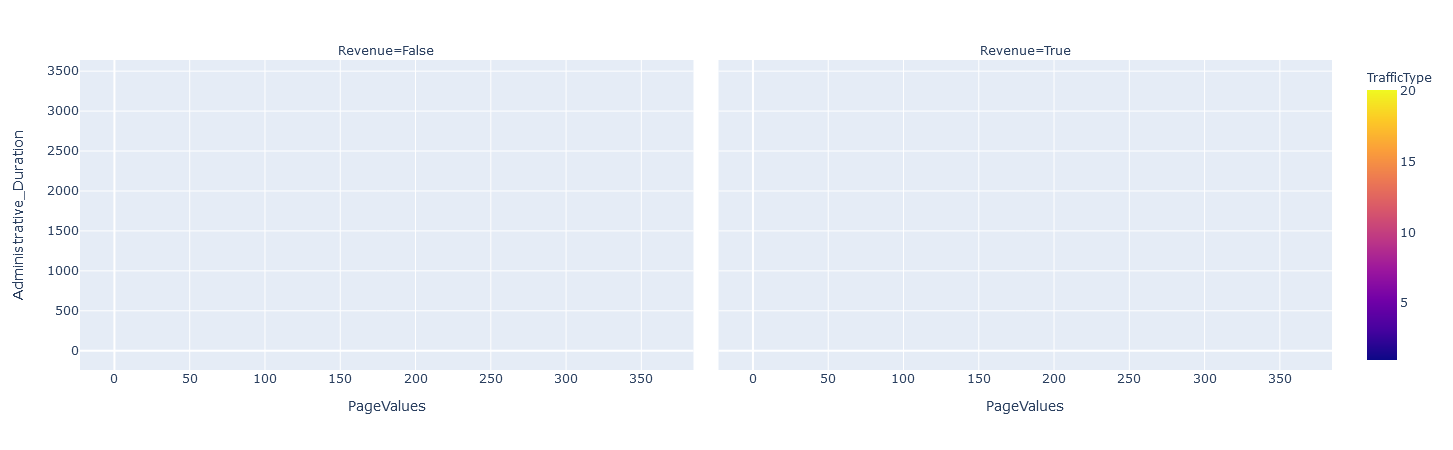

In [24]:
import plotly.express as px
fig2 = px.scatter(df, x="PageValues", y="Administrative_Duration",facet_col="Revenue", color="TrafficType", trendline="ols", render_mode = 'webgl' )
fig2.show()


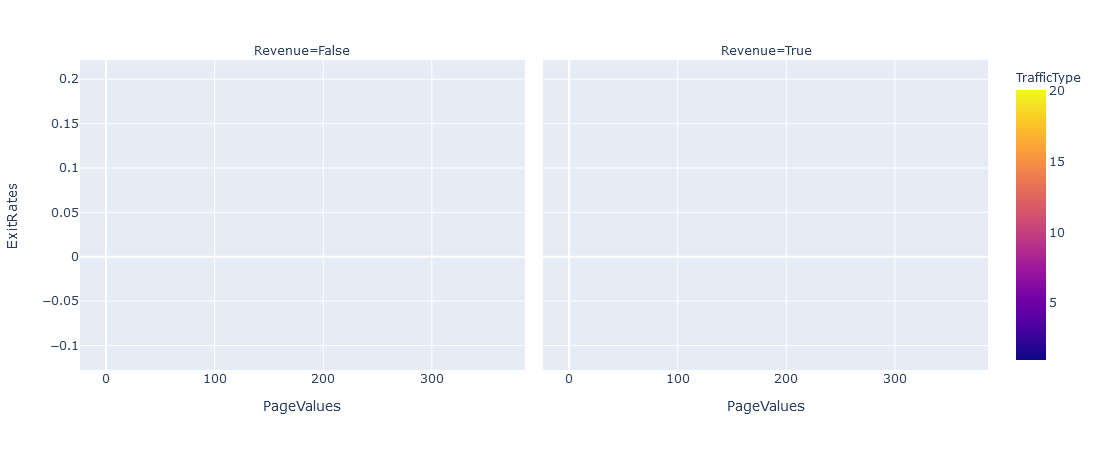

In [25]:
fig3 = px.scatter(df, x="PageValues", y="ExitRates",facet_col="Revenue", color="TrafficType", trendline="ols", render_mode = 'webgl' )
fig3.show()

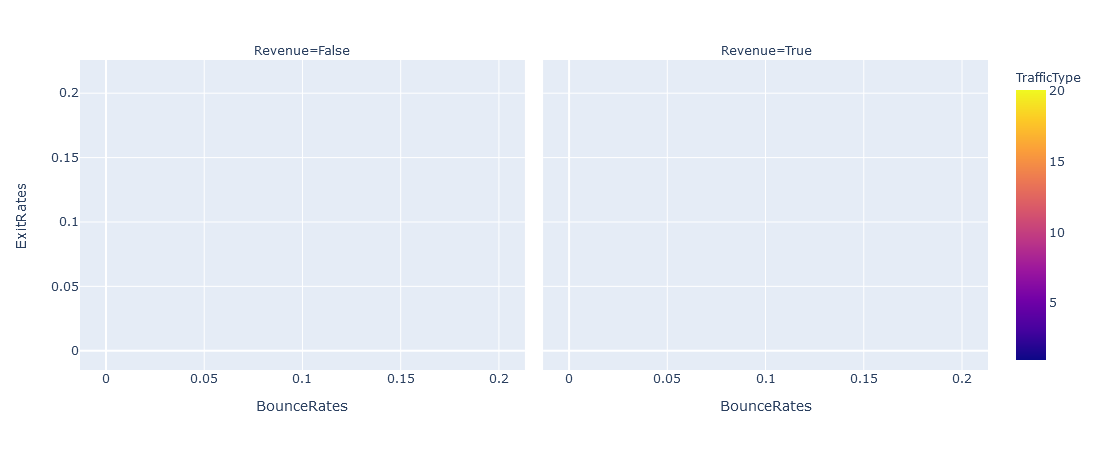

In [26]:
fig3 = px.scatter(df, x="BounceRates", y="ExitRates",facet_col="Revenue", color="TrafficType", trendline="ols", render_mode = 'webgl' )
fig3.show()

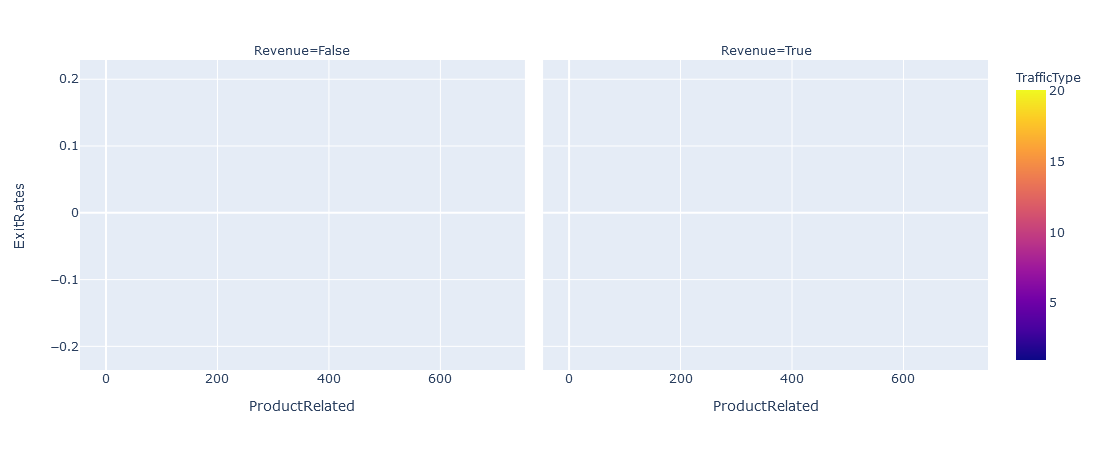

In [27]:
fig3 = px.scatter(df, x="ProductRelated", y="ExitRates",facet_col="Revenue", color="TrafficType", trendline="ols", render_mode = 'webgl' )
fig3.show()

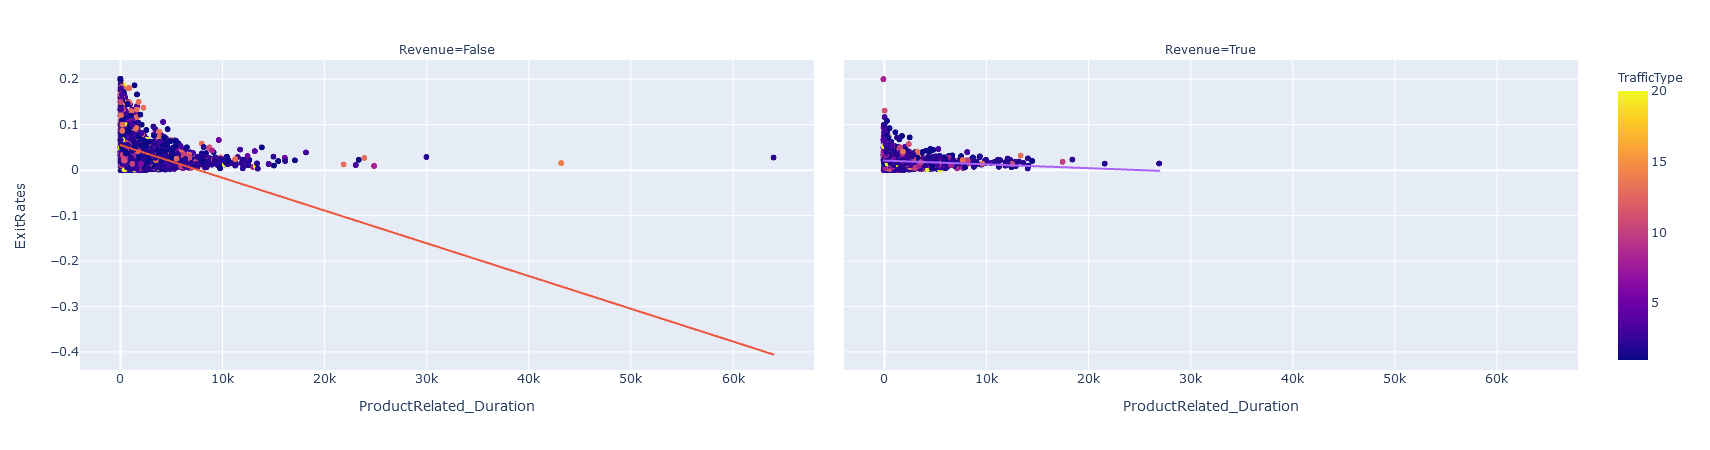

In [28]:
fig3 = px.scatter(df, x="ProductRelated_Duration", y="ExitRates",facet_col="Revenue", color="TrafficType", trendline="ols", render_mode = 'webgl' )
fig3.show()

In [ ]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()